In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
DATA_PATH ='C:/Users/moham/Downloads/mohamed/titanic_prediction_survival/titanic/data/processed/preprocessing_df.pkl'

In [2]:
df = pd.read_pickle(DATA_PATH)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


<AxesSubplot:>

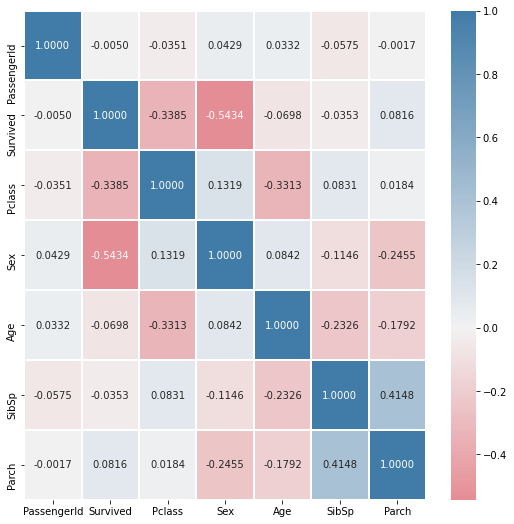

In [4]:
# visualize the correlation matrix
cmap = sns.diverging_palette(h_neg= 10, h_pos=240, as_cmap = True)
plt.figure(figsize=(9,9));
sns.heatmap(df.corr(), center = 0, cmap = cmap, linewidths = 1, annot = True, fmt=".4f")

 - select the y : it will be Survived   and x : all of columns except Survived columns

In [5]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
X = df.loc[: , df.columns != 'Survived']
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,1,22.0,1,0
1,2,1,0,38.0,1,0
2,3,3,0,26.0,0,0
3,4,1,0,35.0,1,0
4,5,3,1,35.0,0,0


In [20]:
# import train_test_split , StandardScaler ,  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
Sc = StandardScaler()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train_scaled = Sc.fit_transform(X_train)

In [19]:
X_test_scaled = Sc.fit_transform(X_test)

In [22]:
Classifire = LogisticRegression()
Classifire.fit(X_train_scaled,y_train)

LogisticRegression()

 - The Training Phase Accuracy

In [23]:
print('The Accuracy of training phase: {}%'. format(round(Classifire.score(X_train_scaled,y_train) * 100 , 2)))

The Accuracy of training phase: 79.21%


In [24]:
y_pred = Classifire.predict(X_test_scaled)

+ the Testing Phase Accuracy

In [25]:
print('The Accuracy of training phase: {}%'. format(round(Classifire.score(X_test_scaled,y_test) * 100 , 2)))

The Accuracy of training phase: 81.56%


 - Check to sample manualy

In [26]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
709,710,3,1,29.699118,1,1
439,440,2,1,31.000000,0,0
840,841,3,1,20.000000,0,0
720,721,2,0,6.000000,0,1
39,40,3,0,14.000000,1,0
...,...,...,...,...,...,...
433,434,3,1,17.000000,0,0
773,774,3,1,29.699118,0,0
25,26,3,0,38.000000,1,5
84,85,2,0,17.000000,0,0


In [32]:
X_test.iloc[1,:]

PassengerId    440.0
Pclass           2.0
Sex              1.0
Age             31.0
SibSp            0.0
Parch            0.0
Name: 439, dtype: float64

In [36]:
# Singel Sample/ 1 row
Classifire.predict(X_test_scaled[1].reshape(1, -1))

array([0], dtype=int64)

In [37]:
df.iloc[439, :]

PassengerId    440.0
Survived         0.0
Pclass           2.0
Sex              1.0
Age             31.0
SibSp            0.0
Parch            0.0
Name: 439, dtype: float64

In [42]:
X_test.iloc[3,:]

PassengerId    721.0
Pclass           2.0
Sex              0.0
Age              6.0
SibSp            0.0
Parch            1.0
Name: 720, dtype: float64

In [43]:
# Singel Sample/ 1 row
Classifire.predict(X_test_scaled[3].reshape(1, -1))

array([1], dtype=int64)

In [44]:
df.iloc[720, :]

PassengerId    721.0
Survived         1.0
Pclass           2.0
Sex              0.0
Age              6.0
SibSp            0.0
Parch            1.0
Name: 720, dtype: float64

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

